In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import itertools
import time
import statsmodels.api as sm
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(r"D:\Users\sandilya_garimella\Documents\Sandilya\DataSets\Automobile_data_cont.csv")

In [3]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
df.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
df = df.replace('?', np.NaN)

In [6]:
df.isnull().sum()

symboling             0
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [10]:
imp_mean = IterativeImputer(random_state=0)
df_mice = imp_mean.fit_transform(df)
df_mice = pd.DataFrame(df_mice)
df_mice.columns = df.columns

In [11]:
df_mice.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,165.077913,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,168.011578,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,136.683116,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.000000,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.000000,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [12]:
X = df_mice.drop(["price"],axis=1)
y = df_mice["price"]

In [13]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [35]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)


(100, 15)

Text(0, 0.5, 'coefs')

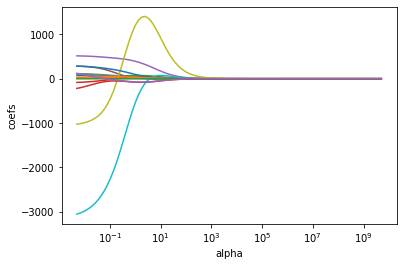

In [36]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coefs')

In [16]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [27]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             
pred2 = ridge2.predict(X_test)           
print(pd.Series(ridge2.coef_, index = X.columns))
print(mean_squared_error(y_test, pred2))  

symboling             298.869567
normalized-losses      18.526840
wheel-base              2.435117
length                -47.208156
width                 604.746593
height                355.880785
curb-weight             2.579634
engine-size            82.630636
bore                  503.888480
stroke              -1842.707675
compression-ratio     319.214577
horsepower             34.742414
peak-rpm                2.390816
city-mpg              -12.787676
highway-mpg           -74.716855
dtype: float64
11963648.740609514


In [18]:
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)            
pred3 = ridge3.predict(X_test)           
print(pd.Series(ridge3.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred3))

symboling           -2.808710e-09
normalized-losses    1.007947e-08
wheel-base           6.797385e-08
length               4.375944e-08
width                2.746513e-07
height               4.087847e-08
curb-weight          1.363477e-09
engine-size          1.702271e-08
bore                 1.432614e-06
stroke              -7.179192e-08
compression-ratio    2.205794e-08
horsepower           1.576639e-08
peak-rpm             4.783280e-11
city-mpg            -8.654644e-08
highway-mpg         -8.589865e-08
dtype: float64
60155625.117093764


In [20]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)             
pred = ridge2.predict(X_test)           
print(pd.Series(ridge2.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred)) 

symboling             330.842660
normalized-losses      13.139411
wheel-base             -2.887804
length               -123.978344
width                 767.405903
height                538.018117
curb-weight             2.362150
engine-size           111.714675
bore                  404.121572
stroke              -2345.455320
compression-ratio     383.359261
horsepower             18.920026
peak-rpm                3.682558
city-mpg              -45.260218
highway-mpg           -74.821918
dtype: float64
12620327.982650131


In [21]:
#choosing the best alpha value using cross validation
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.08148754173103201

In [22]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

11962265.770997245

In [23]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

symboling              29.435525
normalized-losses      18.459509
wheel-base             70.039427
length                -25.695981
width                 478.725297
height                190.400709
curb-weight             2.080780
engine-size            83.337975
bore                 -566.395076
stroke              -2386.872376
compression-ratio     227.191825
horsepower             44.073782
peak-rpm                1.367703
city-mpg              -58.537003
highway-mpg            -7.546414
dtype: float64

### LASSO

Text(0, 0.5, 'coefs')

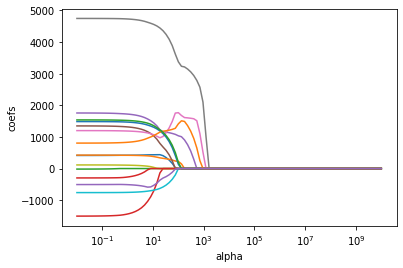

In [34]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coefs')

In [30]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

11935459.064245882

In [31]:
pd.Series(lasso.coef_, index=X.columns)

symboling             348.381457
normalized-losses      11.685442
wheel-base             -0.000000
length                -57.478965
width                 628.814466
height                410.144520
curb-weight             2.097179
engine-size           107.209519
bore                  128.141776
stroke              -2107.030954
compression-ratio     336.390626
horsepower             24.527914
peak-rpm                3.239118
city-mpg               -0.000000
highway-mpg           -78.032546
dtype: float64